In [ ]:
print("tuki")

tuki


In [ ]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Tp Final LDD/2021-2022 Football Player Stats.csv'

In [ ]:
df = pd.read_csv(filename, sep = ';', encoding = 'ISO-8859-1')

In [ ]:
df = df.dropna()
df = df[df['MP']>=10]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Label
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7,4
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8,0
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0,4
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0,4
5,6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,1998,24,5,...,0.25,0.86,0.00,0.00,0.00,4.81,2.72,4.94,35.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0,0
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4,4
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5,4
2919,2920,Milan ?uri?,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.29,0.17,0.04,0.00,0.00,3.24,12.40,4.81,72.0,1


In [ ]:
df.dtypes

Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Label        int32
Length: 144, dtype: object

In [ ]:
df['Nation'].unique()

array(['ENG', 'MAR', 'GHA', 'FRA', 'NGA', 'ITA', 'GER', 'ARG', 'SCO',
       'USA', 'ARM', 'SUI', 'ESP', 'COL', 'BIH', 'CIV', 'NOR', 'REU',
       'EQG', 'NED', 'AUT', 'CHI', 'PAR', 'TUR', 'BRA', 'GAB', 'SEN',
       'WAL', 'DEN', 'SWE', 'PAN', 'JAM', 'URU', 'MEX', 'JPN', 'ALB',
       'TOG', 'ALG', 'CRO', 'CMR', 'COD', 'GRN', 'CZE', 'MKD', 'LUX',
       'GAM', 'GUI', 'CPV', 'SUR', 'POL', 'SVN', 'SVK', 'BEL', 'ISL',
       'KVX', 'GNB', 'MLI', 'SRB', 'TUN', 'NZL', 'POR', 'NIR', 'RUS',
       'ROU', 'IRL', 'VEN', 'ANG', 'ISR', 'ZAM', 'CAN', 'MTQ', 'GRE',
       'BEN', 'CRC', 'HON', 'EGY', 'ECU', 'IRN', 'HUN', 'KOR', 'PHI',
       'FIN', 'BUL', 'AUS', 'UKR', 'MNE', 'BFA', 'ZIM', 'SLE', 'CYP',
       'CTA', 'CHN', 'CGO', 'GEO', 'MOZ', 'RSA', 'CHA', 'GUF', 'UZB',
       'PER'], dtype=object)

In [ ]:
list(df.columns)

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'G/Sh',
 'G/SoT',
 'ShoDist',
 'ShoFK',
 'ShoPK',
 'PKatt',
 'PasTotCmp',
 'PasTotAtt',
 'PasTotCmp%',
 'PasTotDist',
 'PasTotPrgDist',
 'PasShoCmp',
 'PasShoAtt',
 'PasShoCmp%',
 'PasMedCmp',
 'PasMedAtt',
 'PasMedCmp%',
 'PasLonCmp',
 'PasLonAtt',
 'PasLonCmp%',
 'Assists',
 'PasAss',
 'Pas3rd',
 'PPA',
 'CrsPA',
 'PasProg',
 'PasAtt',
 'PasLive',
 'PasDead',
 'PasFK',
 'TB',
 'PasPress',
 'Sw',
 'PasCrs',
 'CK',
 'CkIn',
 'CkOut',
 'CkStr',
 'PasGround',
 'PasLow',
 'PasHigh',
 'PaswLeft',
 'PaswRight',
 'PaswHead',
 'TI',
 'PaswOther',
 'PasCmp',
 'PasOff',
 'PasOut',
 'PasInt',
 'PasBlocks',
 'SCA',
 'ScaPassLive',
 'ScaPassDead',
 'ScaDrib',
 'ScaSh',
 'ScaFld',
 'ScaDef',
 'GCA',
 'GcaPassLive',
 'GcaPassDead',
 'GcaDrib',
 'GcaSh',
 'GcaFld',
 'GcaDef',
 'Tkl',
 'TklWon',
 'TklDef3rd',
 'TklMid3rd',
 'TklAtt3rd',
 'TklDri',
 'TklDriAtt

In [ ]:
df_aux = df[[
 #'Player',
 #'Nation',
 #'Pos',
 #'Squad',
 #'Comp',
 'Age',
 'Min',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'G/Sh',
 'G/SoT',
 'ShoDist',
 'ShoFK',
 'ShoPK',
 'PKatt',
 'PasTotCmp',
 'PasTotAtt',
 'Assists',
 'PasAtt',
 'PasLive',
 'PasDead',
 'TB',
 'PasCrs',
 'PasCmp',
 'SCA',
 'GCA',
 'GcaDrib',
 'GcaSh',
 'Tkl',
 'TklWon',
 'TklDef3rd',
 'TklMid3rd',
 'TklAtt3rd',
 'TklDriPast',
 'Press',
 'Blocks',
 'BlkShSv',
 'BlkPass',
 'Int',
 'Clr',
 'Err',
 'Touches',
 'DriSucc',
 'DriAtt',
 'DriSucc%',
 'DriMegs',
 'Rec',
 'Rec%',
 'CrdY',
 'CrdR',
 '2CrdY',
 'Fls',
 'Fld',
 'Off',
 'Crs',
 'PKwon',
 'PKcon',
 'OG',
 'Recov',
 'AerWon',
 'AerLost',
 'AerWon%']]

In [ ]:
df_filtrado = df[[
 #'Comp',
 'Age',
 'Goals',
 'Shots',
 'SoT%',
 'G/SoT',
 'Assists',
 'PasAtt',
 'SCA',
 'GCA',
 'Tkl',
 'TklWon',
 'Press',
 'Blocks',
 'Int',
 'Clr',
 'Err',
 'Touches',
 'DriSucc%',
 'CrdY',
 'CrdR',
 'Fls',
 'Fld',
 'Off',
 'Crs',
 'Recov',
 'AerWon%']]

In [ ]:
df_filtrado.dropna()

,Age,Goals,Shots,SoT%,G/SoT,Assists,PasAtt,SCA,GCA,Tkl,...,Touches,DriSucc%,CrdY,CrdR,Fls,Fld,Off,Crs,Recov,AerWon%
0,22.0,0.00,0.41,15.4,0.00,0.06,45.0,1.19,0.16,2.16,...,58.0,42.3,0.25,0.00,0.97,1.84,0.03,1.41,5.53,22.7
1,34.0,0.06,0.54,33.3,0.33,0.00,47.0,0.63,0.03,1.87,...,57.3,72.7,0.15,0.03,1.30,0.73,0.00,0.06,6.77,59.8
2,22.0,0.04,0.66,27.8,0.20,0.00,61.0,1.46,0.04,2.01,...,70.4,64.3,0.44,0.11,1.64,1.28,0.00,0.36,8.76,50.0
3,29.0,0.00,0.91,23.3,0.00,0.06,49.8,2.01,0.15,3.57,...,61.6,64.6,0.27,0.00,1.40,2.07,0.03,0.79,8.87,50.0
5,23.0,0.00,2.22,22.2,0.00,0.12,17.2,2.47,0.25,1.73,...,33.0,33.3,0.37,0.00,2.22,1.48,1.85,0.25,4.81,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,23.0,0.07,0.73,47.6,0.20,0.03,50.4,1.18,0.03,2.08,...,59.9,62.5,0.14,0.00,1.60,0.83,0.10,0.10,9.41,65.0
2917,24.0,0.23,1.84,36.2,0.35,0.08,35.7,2.34,0.16,2.77,...,51.7,70.0,0.20,0.00,1.95,2.85,0.00,0.74,8.05,39.4
2918,23.0,0.23,1.72,39.6,0.33,0.13,51.7,4.34,0.39,1.39,...,60.5,52.4,0.13,0.00,1.04,0.74,0.10,0.84,7.44,40.5
2919,32.0,0.21,2.07,38.0,0.21,0.17,28.3,2.32,0.33,0.25,...,37.5,64.7,0.25,0.00,1.20,1.99,0.25,0.29,3.24,72.0


In [ ]:
df_filtrado

,Age,Goals,Shots,SoT%,G/SoT,Assists,PasAtt,SCA,GCA,Tkl,...,Touches,DriSucc%,CrdY,CrdR,Fls,Fld,Off,Crs,Recov,AerWon%
0,22.0,0.00,0.41,15.4,0.00,0.06,45.0,1.19,0.16,2.16,...,58.0,42.3,0.25,0.00,0.97,1.84,0.03,1.41,5.53,22.7
1,34.0,0.06,0.54,33.3,0.33,0.00,47.0,0.63,0.03,1.87,...,57.3,72.7,0.15,0.03,1.30,0.73,0.00,0.06,6.77,59.8
2,22.0,0.04,0.66,27.8,0.20,0.00,61.0,1.46,0.04,2.01,...,70.4,64.3,0.44,0.11,1.64,1.28,0.00,0.36,8.76,50.0
3,29.0,0.00,0.91,23.3,0.00,0.06,49.8,2.01,0.15,3.57,...,61.6,64.6,0.27,0.00,1.40,2.07,0.03,0.79,8.87,50.0
5,23.0,0.00,2.22,22.2,0.00,0.12,17.2,2.47,0.25,1.73,...,33.0,33.3,0.37,0.00,2.22,1.48,1.85,0.25,4.81,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,23.0,0.07,0.73,47.6,0.20,0.03,50.4,1.18,0.03,2.08,...,59.9,62.5,0.14,0.00,1.60,0.83,0.10,0.10,9.41,65.0
2917,24.0,0.23,1.84,36.2,0.35,0.08,35.7,2.34,0.16,2.77,...,51.7,70.0,0.20,0.00,1.95,2.85,0.00,0.74,8.05,39.4
2918,23.0,0.23,1.72,39.6,0.33,0.13,51.7,4.34,0.39,1.39,...,60.5,52.4,0.13,0.00,1.04,0.74,0.10,0.84,7.44,40.5
2919,32.0,0.21,2.07,38.0,0.21,0.17,28.3,2.32,0.33,0.25,...,37.5,64.7,0.25,0.00,1.20,1.99,0.25,0.29,3.24,72.0


In [ ]:
# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(df_filtrado) # encuentro los parametros para el escaleo
X_scale = scaler.transform(df_filtrado) # aplico la transformacion

In [ ]:
normalized_df=(df_filtrado-df_filtrado.min())/(df_filtrado.max()-df_filtrado.min())

In [ ]:
normalized_df

,Age,Goals,Shots,SoT%,G/SoT,Assists,PasAtt,SCA,GCA,Tkl,...,Touches,DriSucc%,CrdY,CrdR,Fls,Fld,Off,Crs,Recov,AerWon%
0,0.217391,0.000000,0.063764,0.154,0.000,0.052174,0.376682,0.162791,0.103896,0.462527,...,0.420225,0.423,0.208333,0.000000,0.180297,0.342007,0.007792,0.169268,0.268345,0.227
1,0.739130,0.041958,0.083981,0.333,0.165,0.000000,0.399103,0.086183,0.019481,0.400428,...,0.412360,0.727,0.125000,0.090909,0.241636,0.135688,0.000000,0.007203,0.357554,0.598
2,0.217391,0.027972,0.102644,0.278,0.100,0.000000,0.556054,0.199726,0.025974,0.430407,...,0.559551,0.643,0.366667,0.333333,0.304833,0.237918,0.000000,0.043217,0.500719,0.500
3,0.521739,0.000000,0.141524,0.233,0.000,0.052174,0.430493,0.274966,0.097403,0.764454,...,0.460674,0.646,0.225000,0.000000,0.260223,0.384758,0.007792,0.094838,0.508633,0.500
5,0.260870,0.000000,0.345257,0.222,0.000,0.104348,0.065022,0.337893,0.162338,0.370450,...,0.139326,0.333,0.308333,0.000000,0.412639,0.275093,0.480519,0.030012,0.216547,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0.260870,0.048951,0.113530,0.476,0.100,0.026087,0.437220,0.161423,0.019481,0.445396,...,0.441573,0.625,0.116667,0.000000,0.297398,0.154275,0.025974,0.012005,0.547482,0.650
2917,0.304348,0.160839,0.286159,0.362,0.175,0.069565,0.272422,0.320109,0.103896,0.593148,...,0.349438,0.700,0.166667,0.000000,0.362454,0.529740,0.000000,0.088836,0.449640,0.394
2918,0.260870,0.160839,0.267496,0.396,0.165,0.113043,0.451794,0.593707,0.253247,0.297645,...,0.448315,0.524,0.108333,0.000000,0.193309,0.137546,0.025974,0.100840,0.405755,0.405
2919,0.652174,0.146853,0.321928,0.380,0.105,0.147826,0.189462,0.317373,0.214286,0.053533,...,0.189888,0.647,0.208333,0.000000,0.223048,0.369888,0.064935,0.034814,0.103597,0.720


In [ ]:
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components = 26)

# Ajuste y transformación de los datos
pca.fit(normalized_df)
X_pca = pca.transform(normalized_df)

Text(0, 0.5, 'Segunda componente principal')

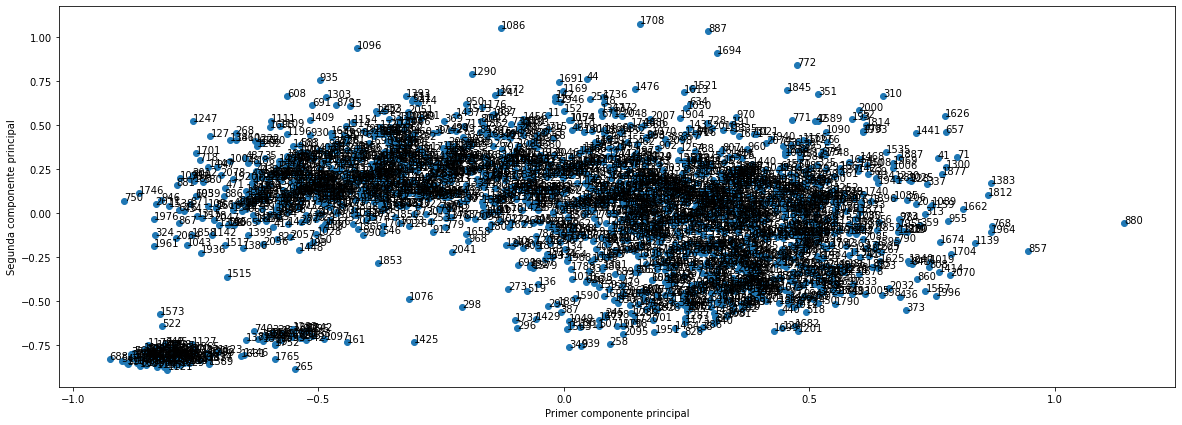

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))


# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde
for i in range(normalized_df.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [ ]:
# Creación del modelo KMeans con k = 40
kmeans = KMeans(n_clusters=5)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(X_pca)

KMeans(n_clusters=5)

In [ ]:
kmeans.labels_

array([0, 2, 0, ..., 4, 1, 1], dtype=int32)

In [ ]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_

# Printeo las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)
# Printeo las posiciones de las primeras 5 muestras en sus primeras dos componentes principales
print(centroids[:5,[0,1]])

Shape de los centroids: (5, 26)
[[ 0.33311677  0.12191768]
 [-0.50170378  0.16229094]
 [ 0.33725822 -0.35415156]
 [-0.74810047 -0.78199298]
 [-0.13733355  0.24052426]]


No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

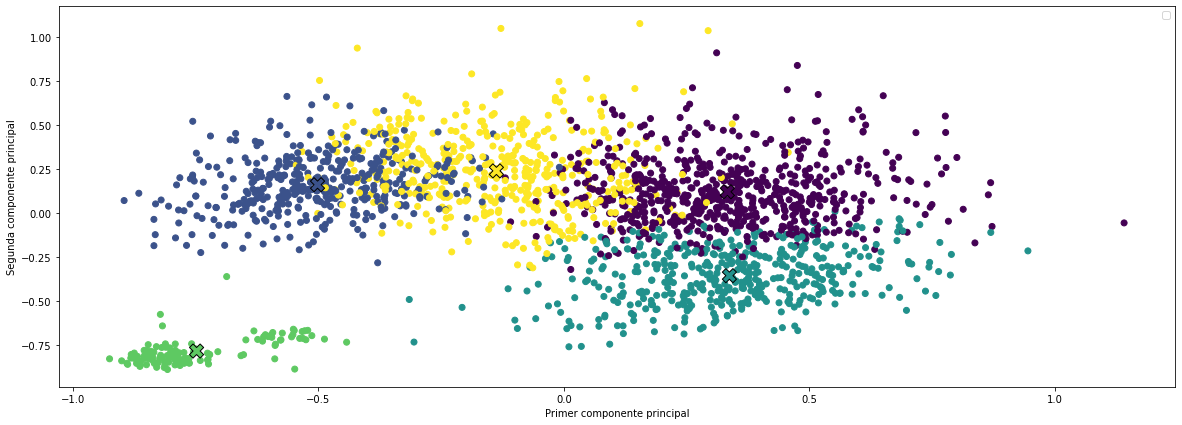

In [ ]:
# Este bloque es similar al anterior pero agregando color a cada sample en el scatter plot según la etiqueta asignada

fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

## Por cada dato escribimos a qué instancia corresponde
#for i in range(data.shape[0]):
#  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [ ]:
df['Label'] = kmeans.labels_.T

In [ ]:
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Label
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7,0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8,2
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0,0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0,0
5,6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,1998,24,5,...,0.25,0.86,0.00,0.00,0.00,4.81,2.72,4.94,35.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0,2
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4,0
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5,4
2919,2920,Milan ?uri?,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.29,0.17,0.04,0.00,0.00,3.24,12.40,4.81,72.0,1


In [ ]:
df.loc[df['Player'] == "Karim Benzema"]


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Label
284,285,Karim Benzema,FRA,FW,Real Madrid,La Liga,34.0,1987,32,31,...,0.94,0.17,0.0,0.0,0.0,3.13,0.63,1.46,30.0,1


In [ ]:
k = 0
df[df['Label']== k]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Label
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7,0
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0,0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0,0
12,13,Marcos Acuña,ARG,DF,Sevilla,La Liga,30.0,1991,31,26,...,4.94,1.55,0.0,0.04,0.00,8.92,1.31,1.47,47.1,0
14,15,Tyler Adams,USA,MF,RB Leipzig,Bundesliga,23.0,1999,24,12,...,0.20,1.07,0.0,0.00,0.00,10.60,1.53,0.80,65.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2889,Alessandro Zanoli,ITA,DF,Napoli,Serie A,21.0,2000,12,5,...,0.98,0.98,0.0,0.00,0.00,7.06,0.98,0.59,62.5,0
2891,2892,Gabriele Zappa,ITA,DF,Cagliari,Serie A,22.0,1999,25,11,...,1.73,0.94,0.0,0.00,0.00,7.72,1.18,1.26,48.4,0
2895,2896,Akim Zedadka,FRA,DF,Clermont Foot,Ligue 1,26.0,1995,38,37,...,2.40,1.13,0.0,0.03,0.00,9.06,0.78,0.97,44.6,0
2897,2898,Marvin Zeegelaar,NED,DF,Udinese,Serie A,31.0,1990,14,6,...,0.14,2.39,0.0,0.14,0.00,8.87,2.54,1.27,66.7,0


In [ ]:
df[df['Player']== 'Lionel Messi']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Label
1774,1775,Lionel Messi,ARG,FWMF,Paris S-G,Ligue 1,34.0,1987,26,24,...,0.75,0.29,0.0,0.0,0.0,4.85,0.25,0.08,75.0,4


In [ ]:
normalized_df['Label'] = kmeans.labels_.T

In [ ]:
df = normalized_df

In [ ]:
df1 = df.groupby('Label')['Goals'].mean()
df.groupby('Label')['Goals'].mean()
df.groupby('Label')['AerWon%'].mean()
df.groupby('Label')['Tkl'].mean()


Label
0    0.557098
1    0.206243
2    0.348970
3    0.000719
4    0.342951
Name: Tkl, dtype: float64

In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:
df1 = df1.to_frame() 

In [ ]:
df1['AerWon%'] = df.groupby('Label')['AerWon%'].mean()

In [ ]:
df1['Tkl'] = df.groupby('Label')['Tkl'].mean()

In [ ]:
df1['CrdY'] = df.groupby('Label')['CrdY'].mean()

In [ ]:
df.groupby('Label')['CrdR'].mean()

Label
0    0.032777
1    0.022139
2    0.043319
3    0.011394
4    0.019882
Name: CrdR, dtype: float64

In [ ]:
df1.loc[0,:]

Goals      0.037775
AerWon%    0.497597
Tkl        0.557098
CrdY       0.220356
Name: 0, dtype: float64

In [ ]:
df1

In [ ]:
df1.columns

Index(['Goals', 'AerWon%', 'Tkl', 'CrdY'], dtype='object')

In [ ]:
import plotly.express as px

df2 = pd.DataFrame(dict(
    r=df1.loc[0,:],
    theta=df1.columns))
fig = px.line_polar(df2, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
df1

,Goals,AerWon%,Tkl,CrdY
Label,,,,
0,0.037775,0.497597,0.557098,0.220356
1,0.229242,0.372755,0.206243,0.155198
2,0.029959,0.614416,0.348970,0.180323
3,0.001455,0.016664,0.000719,0.047800
4,0.117760,0.364025,0.342951,0.144444


In [ ]:
df2 = pd.DataFrame(dict(
    r=df1.loc[3,:],
    theta=df1.columns))
fig = px.line_polar(df2, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()